In [ ]:
#import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, Bidirectional, GRU, Conv1D, GlobalMaxPooling1D, Dense
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import re
from sklearn.model_selection import GridSearchCV
from keras.utils.vis_utils import plot_model
from keras.models import load_model

In [ ]:
#read the dataset
df=pd.read_csv('/content/output.csv')

In [ ]:
#head values
df.head()

,id,tip,tipidea,asin
0,1,No,Plenty large for an active kitchen. Well desig...,B004U4XDY2
1,2,Yes,Next time I will probably go with the bigger w...,B016V308D8
2,3,No,These dreidels are plastic as written and the ...,B016V308D8
3,4,No,This filament is awesome looking. I love the c...,B01B5KO0D6
4,5,No,Bought this to wrap custom ends on wiring for ...,B00NPBUWRC


In [ ]:
#select only necessary columns
df=df[['tip','tipidea','asin']]
df.head()

,tip,tipidea,asin
0,No,Plenty large for an active kitchen. Well desig...,B004U4XDY2
1,Yes,Next time I will probably go with the bigger w...,B016V308D8
2,No,These dreidels are plastic as written and the ...,B016V308D8
3,No,This filament is awesome looking. I love the c...,B01B5KO0D6
4,No,Bought this to wrap custom ends on wiring for ...,B00NPBUWRC


In [ ]:
#check for null values
df.isnull().sum()

tip        0
tipidea    0
asin       0
dtype: int64

In [ ]:
#datatypes of the dataframe
df.dtypes

tip        object
tipidea    object
asin       object
dtype: object

In [ ]:
#shape of the dataframe
df.shape

(573, 3)

In [ ]:
#check for duplicate rows
duplicates = df.duplicated()
df[duplicates]

,tip,tipidea,asin
28,No,Save that refrigerator for pennies!,B00DM8J3MI
29,No,Save that refrigerator for pennies!,B00DM8J3MI
30,No,Save that refrigerator for pennies!,B00DM8J3MI
31,No,Save that refrigerator for pennies!,B00DM8J3MI
32,No,Save that refrigerator for pennies!,B00DM8J3MI
48,No,"Works great, nice look and feel",B00LXFUB14
49,No,"Works great, nice look and feel",B00LXFUB14
78,No,"They fit the job, but it only had 92 bags.",B01G0TI9UM
79,No,"They fit the job, but it only had 92 bags.",B01G0TI9UM
100,No,Good Product for me...,B00OQKSC4Q


In [ ]:
# Remove duplicate rows
df = df.drop_duplicates()

In [ ]:
#shape of the dataframe after removing duplicates
df.shape

(550, 3)

In [ ]:
#tip types counts
df['tip'].value_counts()

No     495
Yes     55
Name: tip, dtype: int64

In [ ]:
#unique products
df['asin'].value_counts()

B00GZE3UJ8    31
B0060EUA32     9
B01CITP03W     9
B01DGEWHN4     8
B000I3PUE0     8
              ..
B01BVXEN3O     1
B010FYZJFQ     1
B000H71302     1
B01DPMUS10     1
B01ABV223A     1
Name: asin, Length: 305, dtype: int64

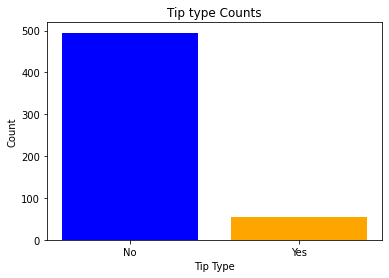

In [ ]:
# Count the occurrences of each overall score
counts = df['tip'].value_counts()

# Define colors for each category
colors = ['blue', 'orange']

# Create a bar chart
plt.bar(counts.index, counts.values, color=colors)

# Set the title and axis labels
plt.title('Tip type Counts')
plt.xlabel('Tip Type')
plt.ylabel('Count')

# Display the plot
plt.show()

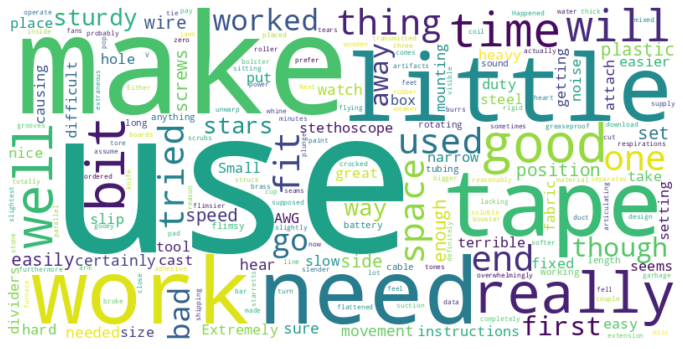

In [ ]:
# Filter the reviews with tip=Yes
reviews_yes = df[df["tip"] == 'Yes']

# Concatenate all the reviews into a single string
reviews_text = " ".join(review for review in reviews_yes.tipidea)

# Generate the wordcloud
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color="white").generate(reviews_text)

# Plot the wordcloud
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

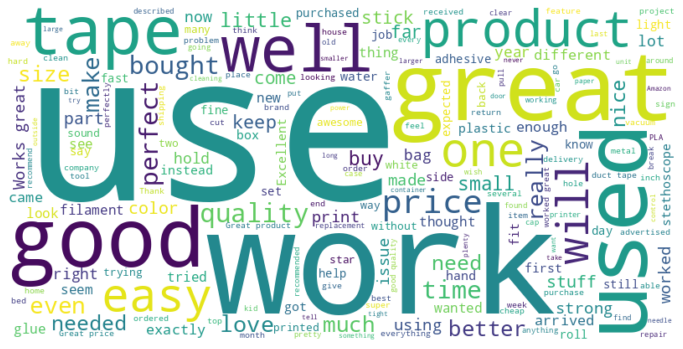

In [ ]:
# Filter the reviews with tip=NO
reviews_no = df[df["tip"] == 'No']

# Concatenate all the reviews into a single string
reviews_text = " ".join(review for review in reviews_no.tipidea)

# Generate the wordcloud
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color="white").generate(reviews_text)

# Plot the wordcloud
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# #remove unessary rows which identified in data annotation
# list=['B001AT53NY','B00WLIQHQ0','B01GWCVBKW','B004SOJIZC','B01CUQ8OK4','B0078QQZ58','B000HJBCYM','B014GXMWYS','B00GZE3UJ8','B01FCZ5RL4']


# # boolean indexing to select rows to keep
# mask = ~(df['asin'].isin(list))

# # drop remaining rows
# df1 = df[mask].dropna()

In [ ]:
#copy the dataframe
df1=df.copy()

In [ ]:
# df1.shape

(550, 3)

In [ ]:
# df1['tip'].value_counts()

No     108
Yes     21
Name: tip, dtype: int64

In [ ]:
#check for tip==Yes
df1[df1['tip']=='Yes']

,tip,tipidea,asin
1,Yes,Next time I will probably go with the bigger w...,B016V308D8
6,Yes,I'm not sure what this tape really is supposed...,B01BCWZV8K
17,Yes,The only bad thing is sometimes I can hear the...,B001ULDADW
20,Yes,"The power supply is garbage though, I can hear...",B005K2TXMO
33,Yes,The only thing i miss from my starretts is the...,B00IG46NL2
42,Yes,The first thing that struck me about this stet...,B000I3PUE0
51,Yes,"Good sturdy boards, but they are not greaseproof.",B01FG5UPXU
53,Yes,Extremely difficult to put on.No instructions ...,B0132ZPXTC
55,Yes,The lacking of a easy way to download data is ...,B011EFY014
58,Yes,The holes in the pad do not line up but they a...,B00CLCIN54


In [ ]:
#mapping tip=Yes/No with 1/0s
df1['tip']=df1.tip.map(dict(Yes=1, No=0))
df1.head()

,tip,tipidea,asin
0,0,Plenty large for an active kitchen. Well desig...,B004U4XDY2
1,1,Next time I will probably go with the bigger w...,B016V308D8
2,0,These dreidels are plastic as written and the ...,B016V308D8
3,0,This filament is awesome looking. I love the c...,B01B5KO0D6
4,0,Bought this to wrap custom ends on wiring for ...,B00NPBUWRC


In [ ]:
#remove all the punctuations and numbers from the tipidea and convert to lower cases(considering all the rows in tipidea)
rt=lambda x: re.sub("[^a-zA-Z]",' ',str(x))
df1["tipidea"]=df["tipidea"].map(rt)
df1["tipidea"]=df["tipidea"].str.lower()
df1.head()

,tip,tipidea,asin
0,0,plenty large for an active kitchen. well desig...,B004U4XDY2
1,1,next time i will probably go with the bigger w...,B016V308D8
2,0,these dreidels are plastic as written and the ...,B016V308D8
3,0,this filament is awesome looking. i love the c...,B01B5KO0D6
4,0,bought this to wrap custom ends on wiring for ...,B00NPBUWRC


In [ ]:
#tokenizing & padding text
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(df1['tipidea'])
sequences = tokenizer.texts_to_sequences(df1['tipidea'])
padded_sequences = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')

In [ ]:
labels = np.array(df1['tip'])
#X_train, X_val, y_train, y_val = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(padded_sequences,labels,test_size=0.2, shuffle = True, random_state = 8)

# Use the same function above for the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state= 8) # 0.25 x 0.8 = 0.2


In [ ]:
#define the model architecture
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=100, input_length=100))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(GRU(128, return_sequences=True)))
model.add(Conv1D(64, kernel_size=3, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
#view the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          1000000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 100, 100)         0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 100, 256)         176640    
 l)                                                              
                                                                 
 conv1d (Conv1D)             (None, 98, 64)            49216     
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                        

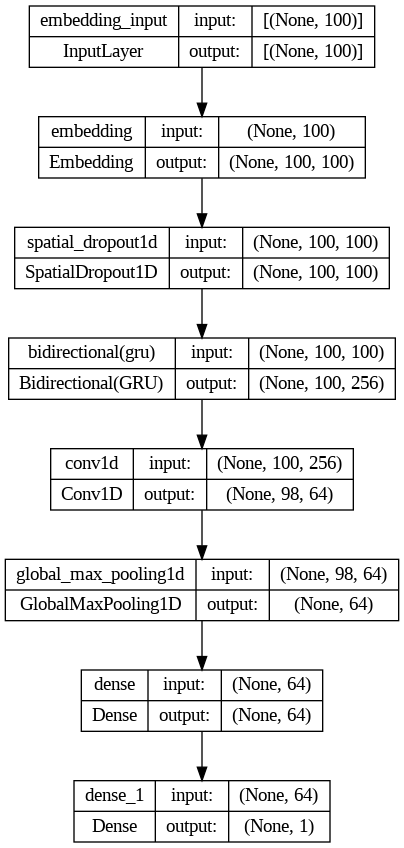

In [ ]:
#draw the model architecture
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history=model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

Epoch 1/100
11/11 [==============================] - 11s 381ms/step - loss: 0.5355 - accuracy: 0.8606 - val_loss: 0.4352 - val_accuracy: 0.8636
Epoch 2/100
11/11 [==============================] - 3s 296ms/step - loss: 0.3627 - accuracy: 0.8909 - val_loss: 0.4045 - val_accuracy: 0.8636
Epoch 3/100
11/11 [==============================] - 4s 400ms/step - loss: 0.3488 - accuracy: 0.8909 - val_loss: 0.4036 - val_accuracy: 0.8636
Epoch 4/100
11/11 [==============================] - 3s 292ms/step - loss: 0.3373 - accuracy: 0.8909 - val_loss: 0.3897 - val_accuracy: 0.8636
Epoch 5/100
11/11 [==============================] - 4s 392ms/step - loss: 0.2859 - accuracy: 0.8909 - val_loss: 0.3799 - val_accuracy: 0.8636
Epoch 6/100
11/11 [==============================] - 5s 440ms/step - loss: 0.1737 - accuracy: 0.9121 - val_loss: 0.6458 - val_accuracy: 0.8455
Epoch 7/100
11/11 [==============================] - 3s 281ms/step - loss: 0.0630 - accuracy: 0.9879 - val_loss: 2.7099 - val_accuracy: 0.827

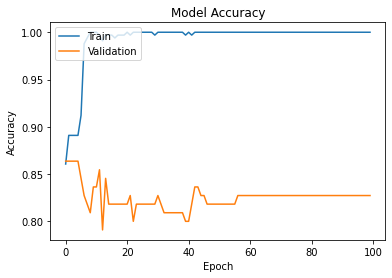

In [ ]:
# Plot the accuracy against the number of epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
#test loss & accuracy
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=32)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

4/4 [==============================] - 1s 101ms/step - loss: 1.3094 - accuracy: 0.8455
Test Loss: 1.309369683265686
Test Accuracy: 0.8454545736312866


In [ ]:
#predict for custom input
# input_text = "very good product"
input_text = "The length of the wire wouldn't have been enough"
#preprocess text
input_sequence = tokenizer.texts_to_sequences([input_text])
padded_input_sequence = pad_sequences(input_sequence, maxlen=100, padding='post', truncating='post')

prediction = model.predict(padded_input_sequence)
if prediction > 0.5:
    print("This is a innovative idea")
else:
    print("This is not a innovative idea")

In [ ]:
# #Hyperparameter tuning parameters for gridsearch
# param_grid = {
#   'gru_units': [32, 64],
#   'conv_filters': [32, 64],
#   'kernel_size': [3, 5],
#   'dropout_rate': [0.2, 0.3],
#   'learning_rate': [0.001, 0.0001]
# }

# grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
# grid_result = grid.fit(padded_sequences, labels)

In [ ]:
#save the model
model.save('model1.h5')

In [ ]:
maxlen = 100
vocab_size = 10000
embedding_dim = 100

In [ ]:
#Model with the best parameters

def create_model(gru_units, conv_filters, kernel_size, dropout_rate, learning_rate):
    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim, input_length=maxlen))
    model.add(Bidirectional(GRU(gru_units, dropout=dropout_rate, recurrent_dropout=dropout_rate, return_sequences=True)))
    model.add(Conv1D(filters=conv_filters, kernel_size=kernel_size, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(1, activation='sigmoid'))
    optimizer = tf.keras.optimizers.Adam(lr=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

model = create_model(32,32,3,0.2,0.001)


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

Epoch 1/100
11/11 [==============================] - 11s 387ms/step - loss: 0.6615 - accuracy: 0.6485 - val_loss: 0.5764 - val_accuracy: 0.8636
Epoch 2/100
11/11 [==============================] - 4s 333ms/step - loss: 0.4725 - accuracy: 0.8909 - val_loss: 0.4143 - val_accuracy: 0.8636
Epoch 3/100
11/11 [==============================] - 3s 273ms/step - loss: 0.3614 - accuracy: 0.8909 - val_loss: 0.4200 - val_accuracy: 0.8636
Epoch 4/100
11/11 [==============================] - 3s 282ms/step - loss: 0.3587 - accuracy: 0.8909 - val_loss: 0.4081 - val_accuracy: 0.8636
Epoch 5/100
11/11 [==============================] - 4s 366ms/step - loss: 0.3532 - accuracy: 0.8909 - val_loss: 0.4053 - val_accuracy: 0.8636
Epoch 6/100
11/11 [==============================] - 3s 288ms/step - loss: 0.3534 - accuracy: 0.8909 - val_loss: 0.4035 - val_accuracy: 0.8636
Epoch 7/100
11/11 [==============================] - 3s 272ms/step - loss: 0.3526 - accuracy: 0.8909 - val_loss: 0.4037 - val_accuracy: 0.863

In [ ]:
#test loss & accuracy(after tuning)
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=32)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

4/4 [==============================] - 0s 34ms/step - loss: 0.5917 - accuracy: 0.9091
Test Loss: 0.5916875600814819
Test Accuracy: 0.9090909361839294


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 bidirectional_1 (Bidirectio  (None, 100, 64)          25728     
 nal)                                                            
                                                                 
 conv1d_1 (Conv1D)           (None, 98, 32)            6176      
                                                                 
 global_max_pooling1d_1 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,031,937
Trainable params: 1,031,937
No

In [ ]:
#save the new model
model.save('model2.h5')